In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#sklearn es la libreria basica de machine learning en python, en este 
# ejemplo utilizaremos de el modulo de descomposición el algoritmo de PCA

from PIL import Image, ImageOps
#pillow es una libreria de procesamiento de imagenes en python

np.random.seed(42)
import matplotlib.pyplot as plt

In [45]:
matriz_alt= np.random.rand(60,10)-0.5
matriz_alt[:3]
#generamos un dataset aleatorio, llamaremos atributos a cada columna y entradas a cad renglón

array([[-0.33106494, -0.22140966, -0.32298952, -0.41129747, -0.37936413,
        -0.03922123, -0.29366628, -0.13573014,  0.00341727,  0.19039483],
       [-0.46068786,  0.2994104 ,  0.12790039, -0.41824097,  0.37357862,
         0.4208724 , -0.43892204, -0.22312235,  0.30620128,  0.24825969],
       [-0.31547898, -0.29065068, -0.1295279 , -0.01547701,  0.11825477,
        -0.13108636, -0.03746528,  0.24747094, -0.4633168 , -0.24756306]])

In [46]:
#Crea una instancia del algoritmo PCA y reduce el dataset a solo 4 atributos
pca=PCA(n_components=4)
matriz4= pca.fit_transform(matriz_alt)
matriz4[:3]

array([[-0.51644204, -0.25935174, -0.20157836,  0.25127525],
       [-0.00179135, -0.60678114, -0.49012922, -0.1630647 ],
       [-0.17254781,  0.06383454,  0.54986442,  0.36399632]])

In [48]:
pca.explained_variance_ratio_ #el metodo nos muestra cuanta varianza captura cada eigenvector de la descomposición

array([0.17872325, 0.16084654, 0.1343148 , 0.11559559])

In [49]:
#utilizando la funcion de np.cumsum y el metodo anterior se puede obtener el numero de componentes
# necesarios para mantener un minimo de información que queramos
pca2=PCA()
pca2.fit(matriz_alt)
cumsum=np.cumsum(pca2.explained_variance_ratio_)
d=np.argmax(cumsum>=0.75)+1
d

6

In [26]:
#Carga una imagen 

img=Image.open(r"C:\Users\mal_b\Downloads\110630942_746151f7ce.jpg")


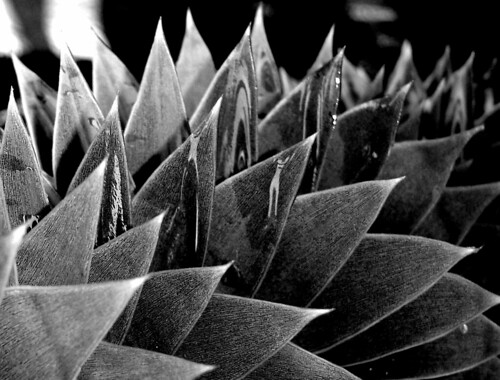

In [27]:
img

In [28]:
img_arr=np.array(img)

In [55]:
img_arr[:10,:3]

array([[254, 249, 235],
       [254, 251, 243],
       [254, 251, 252],
       [254, 250, 255],
       [255, 250, 255],
       [255, 251, 255],
       [255, 252, 255],
       [253, 252, 255],
       [254, 253, 255],
       [254, 252, 254]], dtype=uint8)

In [32]:
img_arr.shape

(380, 500)

In [34]:
pca=PCA()
pca.fit(img_arr)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d

47

In [35]:
pca2=PCA(n_components=0.95)
red=pca2.fit_transform(img_arr)
red.shape

(380, 47)

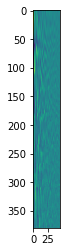

In [38]:
fig, ax=plt.subplots()
ax.imshow(red)
plt.show()

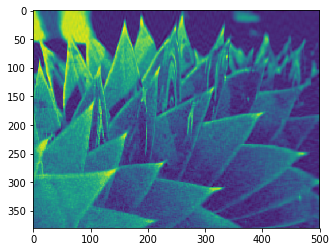

In [39]:
rec=pca2.inverse_transform(red)
fig, ax=plt.subplots()
ax.imshow(rec)
plt.show()